# Data Viz

In [29]:
## ------------------------Installing libraries------------------------------------------------
# Install from CRAN
#install.packages("tidyverse")
#install.packages("lubridate")
install.packages("openxlsx")

Installation du package dans 'C:/Users/matheo/Documents/R/win-library/4.1'
(car 'lib' n'est pas spécifié)

installation de la dépendance 'zip'





  Des versions binaires sont disponibles mais les versions des sources
  sont plus récentes:
          binary source needs_compilation
zip        2.3.0  2.3.2              TRUE
openxlsx 4.2.5.2  4.2.8              TRUE

  Binaries will be installed
package 'zip' successfully unpacked and MD5 sums checked
package 'openxlsx' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\matheo\AppData\Local\Temp\RtmpighMhU\downloaded_packages


In [30]:
##______________________________ LOADING LIBRARIES________________________
library(readr)
library(tidyverse)
library(lubridate)
library(ggplot2)
library(openxlsx)

In [3]:
# Functions

## This function reads csv data files
read_data <- function(filename, delim_f, skip_f) {
    
    ## Read data file
    data <- read_delim(filename, delim=delim_f, skip=skip_f,
                   col_names=c("datetime","O3","NO2","SO2","CO","PM10","TEMP","PREC","RAD"), show_col_types = FALSE)
    # show_col_types = TRUE shows the column types to explicit what each column contains

    return(data)
}

In [4]:
## Specify settings
Sys.setlocale("LC_TIME","C")
options(stringsAsFactors=FALSE)
theme_set(theme_bw()) # just my preference for plots

[1] "C"

In [5]:
## ------------------LOADING DATA------------------------------------------------------
## Define input file (located in same directory)
BASEL <- "./Data/BAS(1).csv"
file.exists(BASEL)

DAVOS <- "./Data/DAV.csv"
file.exists(DAVOS)

[1] TRUE

[1] TRUE

In [6]:
##____________________READING DATA_____________
#DAVOS_data <- read_data(DAVOS, ";", 6)
DAVOS_data <- read_delim(DAVOS, delim=";", skip=6,
               col_names=c("datetime","O3","NO2","PM10","NOx","TEMP","PREC","RAD"), show_col_types = FALSE)
# BASEL_data <- read_data(BASEL, ";", 6)
## Read data file
BASEL_data <- read_delim(BASEL, delim=";", skip=6,
               col_names=c("datetime","O3","NO2","SO2","PM10","PM2.5","EC", "CPC", "NOx","TEMP","PREC","RAD"), show_col_types = FALSE)
# show_col_types = TRUE shows the column types to explicit what each column contains


In [7]:
## ------------------------------------------------------------------------
## View information stored in object
cat("Davos dataset:\n")
str(DAVOS_data)

cat("\nBasel dataset:\n")
str(BASEL_data)

Davos dataset:
spc_tbl_ [8,784 x 8] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ datetime: chr [1:8784] "01.01.2024 01:00" "01.01.2024 02:00" "01.01.2024 03:00" "01.01.2024 04:00" ...
 $ O3      : num [1:8784] 57.7 55.2 49.9 52.1 65.8 67.1 64 58.4 61.8 59 ...
 $ NO2     : num [1:8784] 1.9 2.1 3.7 4.5 0.7 0.7 3.4 5.4 1.7 2.9 ...
 $ PM10    : num [1:8784] 1.2 1.5 2.2 3 0.2 0.4 0.3 0.3 0.3 0.4 ...
 $ NOx     : num [1:8784] 1.9 2.1 3.7 4.6 0.7 0.7 3.5 5.4 1.8 3.4 ...
 $ TEMP    : num [1:8784] -2.2 -2.8 -3.3 -4.2 -5.2 -5.6 -5.7 -5.9 -5.7 -5.3 ...
 $ PREC    : num [1:8784] 0 0 0 0 0 0 0 0 0 0 ...
 $ RAD     : num [1:8784] -0.6 -0.7 -0.7 -1.1 -1.3 -0.8 -0.6 -0.6 22.6 73.9 ...
 - attr(*, "spec")=
  .. cols(
  ..   datetime = col_character(),
  ..   O3 = col_double(),
  ..   NO2 = col_double(),
  ..   PM10 = col_double(),
  ..   NOx = col_double(),
  ..   TEMP = col_double(),
  ..   PREC = col_double(),
  ..   RAD = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 

Basel dataset:
spc_tbl

In [8]:
## ------------------------------------------------------------------------
## View first 6 lines
cat("DAVOS:\n")
head(DAVOS_data)
cat("\nBASEL:\n")
head(BASEL_data)

DAVOS:


datetime,O3,NO2,PM10,NOx,TEMP,PREC,RAD
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
01.01.2024 01:00,57.7,1.9,1.2,1.9,-2.2,0,-0.6
01.01.2024 02:00,55.2,2.1,1.5,2.1,-2.8,0,-0.7
01.01.2024 03:00,49.9,3.7,2.2,3.7,-3.3,0,-0.7
01.01.2024 04:00,52.1,4.5,3.0,4.6,-4.2,0,-1.1
01.01.2024 05:00,65.8,0.7,0.2,0.7,-5.2,0,-1.3
01.01.2024 06:00,67.1,0.7,0.4,0.7,-5.6,0,-0.8



BASEL:


datetime,O3,NO2,SO2,PM10,PM2.5,EC,CPC,NOx,TEMP,PREC,RAD
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
01.01.2024 01:00,60.2,7.5,1.6,35.8,25.2,0.4,10340.6,8.7,5.5,0.0,0.0
01.01.2024 02:00,70.0,1.9,0.7,7.2,4.4,0.1,2394.0,2.5,6.6,0.0,0.0
01.01.2024 03:00,70.3,1.5,0.4,3.7,1.8,0.0,1341.2,2.1,5.7,1.4,0.0
01.01.2024 04:00,67.0,1.3,0.3,2.0,1.0,0.0,1172.6,2.0,5.7,0.0,0.0
01.01.2024 05:00,66.5,2.0,0.3,2.9,1.4,0.1,1308.0,2.7,5.7,0.0,0.2
01.01.2024 06:00,67.1,2.7,0.3,4.6,2.1,0.1,1455.6,3.3,5.9,0.0,0.0


In [9]:
# Parse the datetime with the 'Europe/Paris' timezone
# Parse the datetime column (assuming it's named correctly)
##data[["datetime"]] <- parse_date_time(data[["datetime"]], "%d.%m.%Y %H:%M", tz = "Europe/Paris")

# Using $ to access the datetime column 
## TO DO only once
DAVOS_data$datetime <- parse_date_time(DAVOS_data$datetime, "%d.%m.%Y %H:%M", tz = "Europe/Paris")

Warning message:
" 1 failed to parse."


In [10]:
#checking table rows 
invalid_rows <- which(is.na(DAVOS_data$datetime))
invalid_rows
invalid_dates <- DAVOS_data[is.na(DAVOS_data$datetime), ]
invalid_dates

[1] 2162

datetime,O3,NO2,PM10,NOx,TEMP,PREC,RAD
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NA,68.5,0.6,0.2,0.7,0.3,1.3,0


In [11]:
## uncomment th eline below to coorect ptential errors
DAVOS_data[invalid_rows, "datetime"] <- as.POSIXct("2024-03-31 02:00:00")

In [12]:
# Extract the month
DAVOS_data[["month"]] <- month(DAVOS_data[["datetime"]])

# Extract the date (without time)
DAVOS_data[["date"]] <- date(DAVOS_data[["datetime"]])

# Check the results
head(DAVOS_data)

datetime,O3,NO2,PM10,NOx,TEMP,PREC,RAD,month,date
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<date>
2024-01-01 01:00:00,57.7,1.9,1.2,1.9,-2.2,0,-0.6,1,2024-01-01
2024-01-01 02:00:00,55.2,2.1,1.5,2.1,-2.8,0,-0.7,1,2024-01-01
2024-01-01 03:00:00,49.9,3.7,2.2,3.7,-3.3,0,-0.7,1,2024-01-01
2024-01-01 04:00:00,52.1,4.5,3.0,4.6,-4.2,0,-1.1,1,2024-01-01
2024-01-01 05:00:00,65.8,0.7,0.2,0.7,-5.2,0,-1.3,1,2024-01-01
2024-01-01 06:00:00,67.1,0.7,0.4,0.7,-5.6,0,-0.8,1,2024-01-01


In [13]:
# Second check to make sure the file is fixed : #checking table rows 
invalid_rows <- which(is.na(DAVOS_data$datetime))
invalid_rows
invalid_dates <- DAVOS_data[is.na(DAVOS_data$datetime), ]
invalid_dates

integer(0)

datetime,O3,NO2,PM10,NOx,TEMP,PREC,RAD,month,date
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<date>


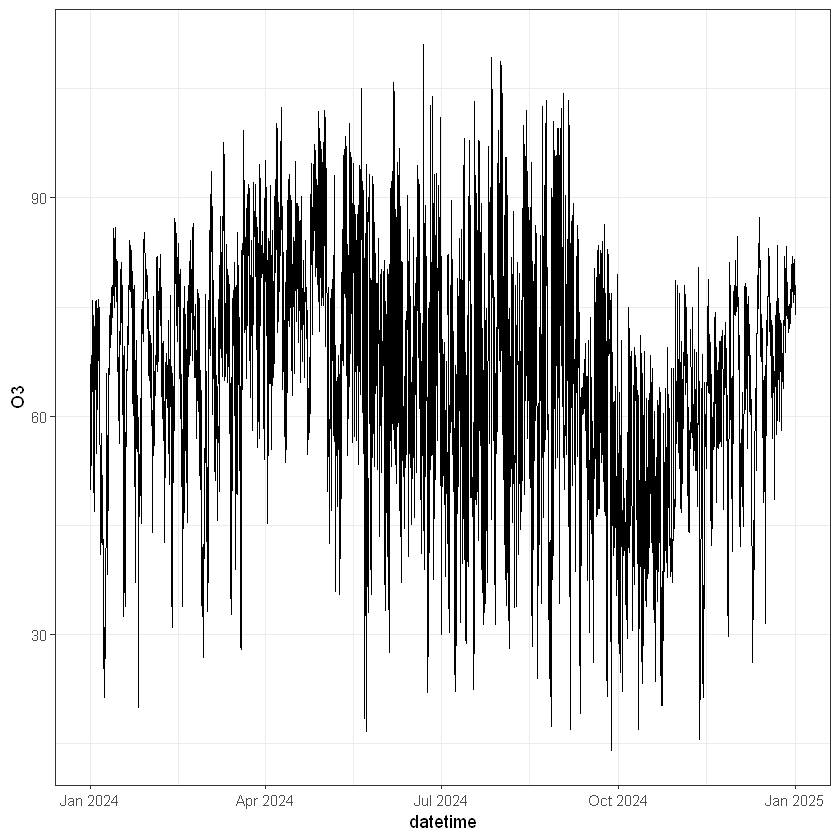

In [14]:
## ---- fig.width=8, fig.height=5------------------------------------------
ggplot(DAVOS_data)+
  geom_line(aes(datetime, O3))

In [15]:
class(DAVOS_data$datetime)

[1] "POSIXct" "POSIXt"

In [16]:
# Parse the datetime with the 'Europe/Paris' timezone
# Parse the datetime column (assuming it's named correctly)
##data[["datetime"]] <- parse_date_time(data[["datetime"]], "%d.%m.%Y %H:%M", tz = "Europe/Paris")

# Using $ to access the datetime column
BASEL_data$datetime <- parse_date_time(BASEL_data$datetime, "%d.%m.%Y %H:%M", tz = "Europe/Paris")

Warning message:
" 1 failed to parse."


In [17]:
#checking table rows 
invalid_rows <- which(is.na(BASEL_data$datetime))
invalid_rows
invalid_dates <- BASEL_data[is.na(BASEL_data$datetime), ]
invalid_dates

[1] 2162

datetime,O3,NO2,SO2,PM10,PM2.5,EC,CPC,NOx,TEMP,PREC,RAD
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NA,44.9,15.4,0.6,17.4,11.8,0.4,9307.1,15.7,8.3,0,0


In [18]:
## uncomment th eline below to coorect ptential errors
BASEL_data[invalid_rows, "datetime"] <- as.POSIXct("2024-03-31 02:00:00")

In [19]:
# Extract the month
BASEL_data[["month"]] <- month(BASEL_data[["datetime"]])

# Extract the date (without time)
BASEL_data[["date"]] <- date(BASEL_data[["datetime"]])

# Check the results
head(BASEL_data)

datetime,O3,NO2,SO2,PM10,PM2.5,EC,CPC,NOx,TEMP,PREC,RAD,month,date
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<date>
2024-01-01 01:00:00,60.2,7.5,1.6,35.8,25.2,0.4,10340.6,8.7,5.5,0.0,0.0,1,2024-01-01
2024-01-01 02:00:00,70.0,1.9,0.7,7.2,4.4,0.1,2394.0,2.5,6.6,0.0,0.0,1,2024-01-01
2024-01-01 03:00:00,70.3,1.5,0.4,3.7,1.8,0.0,1341.2,2.1,5.7,1.4,0.0,1,2024-01-01
2024-01-01 04:00:00,67.0,1.3,0.3,2.0,1.0,0.0,1172.6,2.0,5.7,0.0,0.0,1,2024-01-01
2024-01-01 05:00:00,66.5,2.0,0.3,2.9,1.4,0.1,1308.0,2.7,5.7,0.0,0.2,1,2024-01-01
2024-01-01 06:00:00,67.1,2.7,0.3,4.6,2.1,0.1,1455.6,3.3,5.9,0.0,0.0,1,2024-01-01


In [21]:
#second check to make sure everything is fixed
invalid_rows <- which(is.na(BASEL_data$datetime))
invalid_rows
invalid_dates <- BASEL_data[is.na(BASEL_data$datetime), ]
invalid_dates

integer(0)

datetime,O3,NO2,SO2,PM10,PM2.5,EC,CPC,NOx,TEMP,PREC,RAD,month,date
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<date>


## Problem 3

In [69]:
reg_val <- "./Data/Regulatory_values.xlsx"
file.exists(reg_val)

limits.daily <- read.xlsx(reg_val, sheet = 1)

[1] TRUE

In [70]:
# Second option
limits.daily <- tibble(value=c(100,80,8,50),
                       variable=c("SO2","NO2","CO","PM10"))

In [71]:
limits.daily

value,variable
<dbl>,<chr>
100,SO2
80,NO2
8,CO
50,PM10


In [72]:
Sys.setlocale("LC_TIME","C")
options(stringsAsFactors=FALSE)
options(dplyr.summarise.inform = FALSE)
theme_set(theme_bw()) # just my preference for plots

[1] "C"

In [73]:
month2season <- function(month) {
  ## month is an integer (1-12)
  ## a factor with levels {"Winter : DJF", "Spring : MAM", "Summer : JJA", "Autumn : SON"} is returned
  seasons <- c("Winter", "Spring", "Summer", "Autumn")
  index <- findInterval(month %% 12, seq(0, 12, 3))
  factor(seasons[index], seasons)
}

wday2type <- function(wday) {
  ## wday is an integer with 1 = Monday, 2 = Tuesday, ... and 7 = Sunday
  c("Weekday", "Weekend")[(unclass(wday) - 1) %/% 5 + 1]
}

In [74]:
month2season(c(1, 2, 3))

[1] Winter Winter Spring
Levels: Winter Spring Summer Autumn

In [160]:
read_tseries <- function(filename, timecolumn = "Date/time", timeformat = "%d.%m.%Y %H:%M", tz = "Europe/Paris", delta = 3600) {
  ## read the table, strip units in column names, rename time column
  ##   and change data type of time column from a string of characters to
  ##   a numeric type so that we can perform operations on it

  data <- read_delim(filename, skip = 5, delim = ";", locale = locale(encoding = "Latin1"), show_col_types = FALSE)

  out <- data %>%
    rename_with(.fn = function(x) sub("[ ].*$", "", x)) %>% # strip units for simplification
    rename(datetime = !!timecolumn) %>%
    mutate(datetime = parse_date_time(datetime, !!timeformat, !!tz) - !!delta) %>%
    mutate(year = year(datetime),
           month = month(datetime),
           day = day(datetime),
           hour = hour(datetime),
           dayofwk = wday(datetime, label = TRUE, week_start = 1),
           daytype = wday2type(dayofwk),
           season = month2season(month),
           .after = datetime)
}

In [161]:
datapath <- file.path("Data")

all_data_df <- full_join(
  bind_cols(site="DAV", read_tseries(file.path(datapath, "DAV.csv"))),
  bind_cols(site="BAS", read_tseries(file.path(datapath, "BAS(1).csv")))
)

Warning message:
"There was 1 warning in `mutate()`.
i In argument: `datetime = -...`.
Caused by warning:
!  1 failed to parse."
Warning message:
"There was 1 warning in `mutate()`.
i In argument: `datetime = -...`.
Caused by warning:
!  1 failed to parse."
Joining with `by = join_by(site, datetime, year, month, day, hour, dayofwk, daytype, season, O3, NO2, PM10, NOX, TEMP,
PREC, RAD)`


In [162]:
all_data_df

site,datetime,year,month,day,hour,dayofwk,daytype,season,O3,NO2,PM10,NOX,TEMP,PREC,RAD,SO2,PM2.5,EC,CPC
<chr>,<dttm>,<dbl>,<dbl>,<int>,<int>,<ord>,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
DAV,2024-01-01 00:00:00,2024,1,1,0,Mon,Weekday,Winter,57.7,1.9,1.2,1.9,-2.2,0,-0.6,NA,NA,NA,NA
DAV,2024-01-01 01:00:00,2024,1,1,1,Mon,Weekday,Winter,55.2,2.1,1.5,2.1,-2.8,0,-0.7,NA,NA,NA,NA
DAV,2024-01-01 02:00:00,2024,1,1,2,Mon,Weekday,Winter,49.9,3.7,2.2,3.7,-3.3,0,-0.7,NA,NA,NA,NA
DAV,2024-01-01 03:00:00,2024,1,1,3,Mon,Weekday,Winter,52.1,4.5,3.0,4.6,-4.2,0,-1.1,NA,NA,NA,NA
DAV,2024-01-01 04:00:00,2024,1,1,4,Mon,Weekday,Winter,65.8,0.7,0.2,0.7,-5.2,0,-1.3,NA,NA,NA,NA
DAV,2024-01-01 05:00:00,2024,1,1,5,Mon,Weekday,Winter,67.1,0.7,0.4,0.7,-5.6,0,-0.8,NA,NA,NA,NA
DAV,2024-01-01 06:00:00,2024,1,1,6,Mon,Weekday,Winter,64.0,3.4,0.3,3.5,-5.7,0,-0.6,NA,NA,NA,NA
DAV,2024-01-01 07:00:00,2024,1,1,7,Mon,Weekday,Winter,58.4,5.4,0.3,5.4,-5.9,0,-0.6,NA,NA,NA,NA
DAV,2024-01-01 08:00:00,2024,1,1,8,Mon,Weekday,Winter,61.8,1.7,0.3,1.8,-5.7,0,22.6,NA,NA,NA,NA


In [163]:
#checking table rows 
invalid_rows <- which(is.na(all_data_df$datetime))
invalid_rows
invalid_dates <- all_data_df[is.na(all_data_df$datetime), ]
invalid_dates

[1]  2162 10946

site,datetime,year,month,day,hour,dayofwk,daytype,season,O3,NO2,PM10,NOX,TEMP,PREC,RAD,SO2,PM2.5,EC,CPC
<chr>,<dttm>,<dbl>,<dbl>,<int>,<int>,<ord>,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
DAV,NA,NA,NA,NA,NA,NA,NA,NA,68.5,0.6,0.2,0.7,0.3,1.3,0,NA,NA,NA,NA
BAS,NA,NA,NA,NA,NA,NA,NA,NA,44.9,15.4,17.4,15.7,8.3,0.0,0,0.6,11.8,0.4,9307.1


In [171]:
saveRDS(all_data_df, "DATA/DAV-BAS.rds")

In [173]:
all_data_lf <- all_data_df %>%
  pivot_longer(-c(site, datetime, season, year, month, day, hour, dayofwk, daytype),  # id columns
               names_to = "variable",
               values_to = "value")

In [174]:
all_data_lf

site,datetime,year,month,day,hour,dayofwk,daytype,season,variable,value
<chr>,<dttm>,<dbl>,<dbl>,<int>,<int>,<ord>,<chr>,<fct>,<chr>,<dbl>
DAV,2024-01-01 00:00:00,2024,1,1,0,Mon,Weekday,Winter,O3,57.7
DAV,2024-01-01 00:00:00,2024,1,1,0,Mon,Weekday,Winter,NO2,1.9
DAV,2024-01-01 00:00:00,2024,1,1,0,Mon,Weekday,Winter,PM10,1.2
DAV,2024-01-01 00:00:00,2024,1,1,0,Mon,Weekday,Winter,NOX,1.9
DAV,2024-01-01 00:00:00,2024,1,1,0,Mon,Weekday,Winter,TEMP,-2.2
DAV,2024-01-01 00:00:00,2024,1,1,0,Mon,Weekday,Winter,PREC,0.0
DAV,2024-01-01 00:00:00,2024,1,1,0,Mon,Weekday,Winter,RAD,-0.6
DAV,2024-01-01 00:00:00,2024,1,1,0,Mon,Weekday,Winter,SO2,NA
DAV,2024-01-01 00:00:00,2024,1,1,0,Mon,Weekday,Winter,PM2.5,NA


Warning message:
"Removed 17568 rows containing missing values (`geom_line()`)."


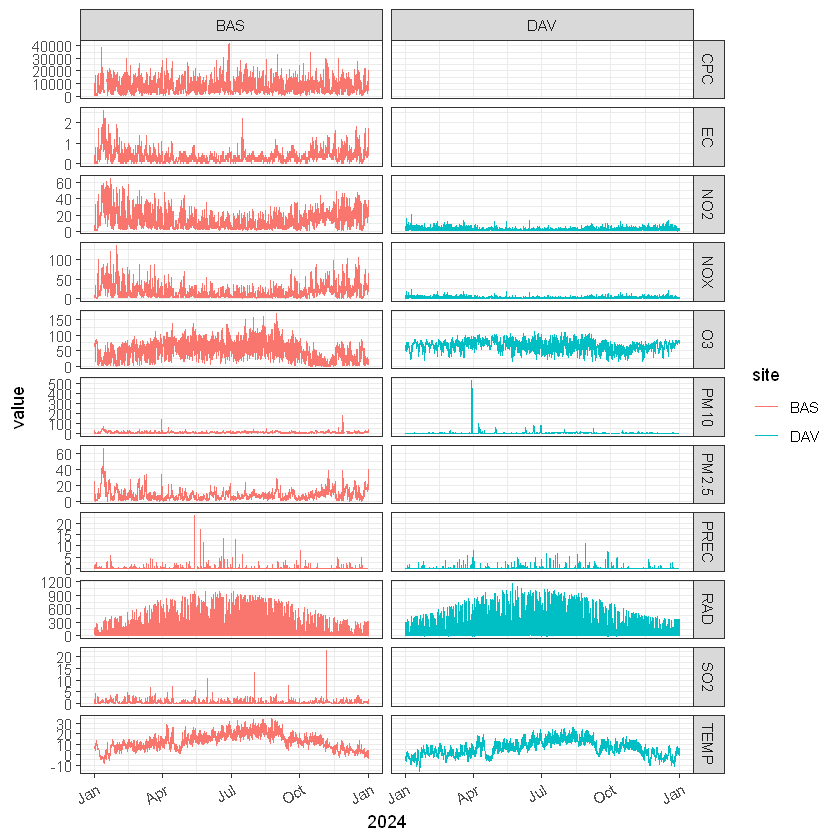

In [185]:
  ggplot(all_data_lf)+                                        # `lf` is the data frame
  facet_grid(variable~site, scale="free_y")+         # panels created out of these variables
  geom_line(aes(datetime, value, color=site))+       # plot `value` vs. `time` as lines
  scale_x_datetime("2024", date_labels = "%b") +
  theme(axis.text.x=element_text(angle=30, hjust=1)) # rotate x-axis labels

## checking data completeness

In [180]:
colSums(is.na(DAVOS_data))

datetime       O3      NO2     PM10      NOx     TEMP     PREC      RAD 
       0       18       22       98       22        0        1        0 
   month     date 
       0        0

In [181]:
colSums(is.na(BASEL_data))

datetime       O3      NO2      SO2     PM10    PM2.5       EC      CPC 
       0       67       74       68      113      281       48      187 
     NOx     TEMP     PREC      RAD    month     date 
      74        0       72        0        0        0

In [183]:
colSums(is.na(all_data_df))

site datetime     year    month      day     hour  dayofwk  daytype 
       0        0        2        2        2        2        2        2 
  season       O3      NO2     PM10      NOX     TEMP     PREC      RAD 
       2       85       96      211       96        0       73        0 
     SO2    PM2.5       EC      CPC 
    8852     9065     8832     8971

Warning message:
"Removed 36281 rows containing non-finite values (`stat_boxplot()`)."


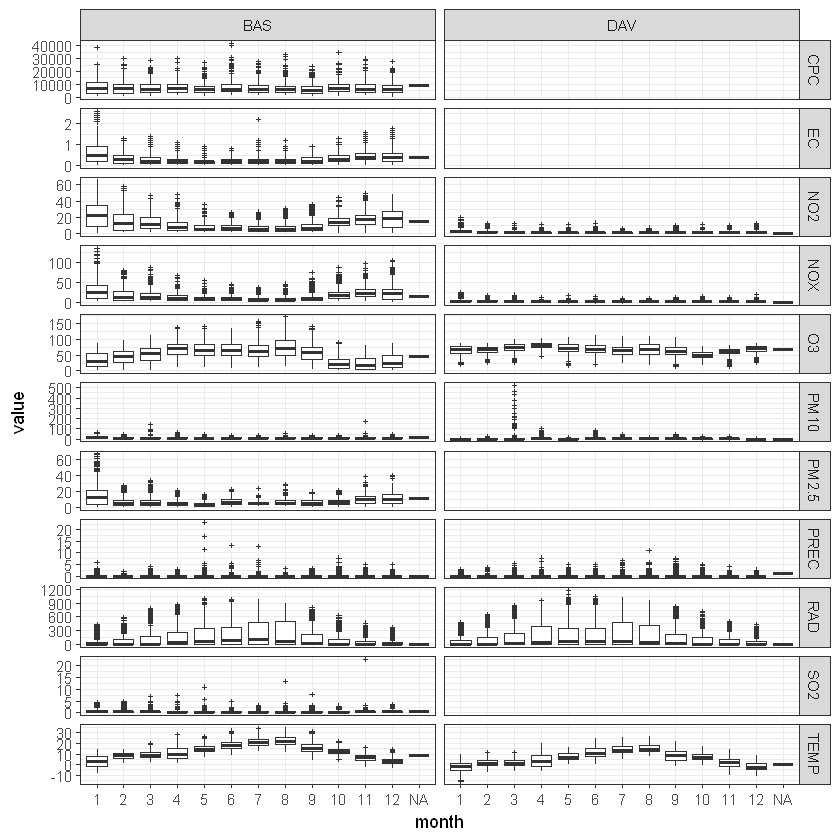

In [186]:
lf %>% 
  mutate(month = factor(month)) %>%
  ggplot +
  facet_grid(variable ~ site, scale = "free_y") +
  geom_boxplot(aes(month, value), outlier.size = 0.5, outlier.shape = 3)

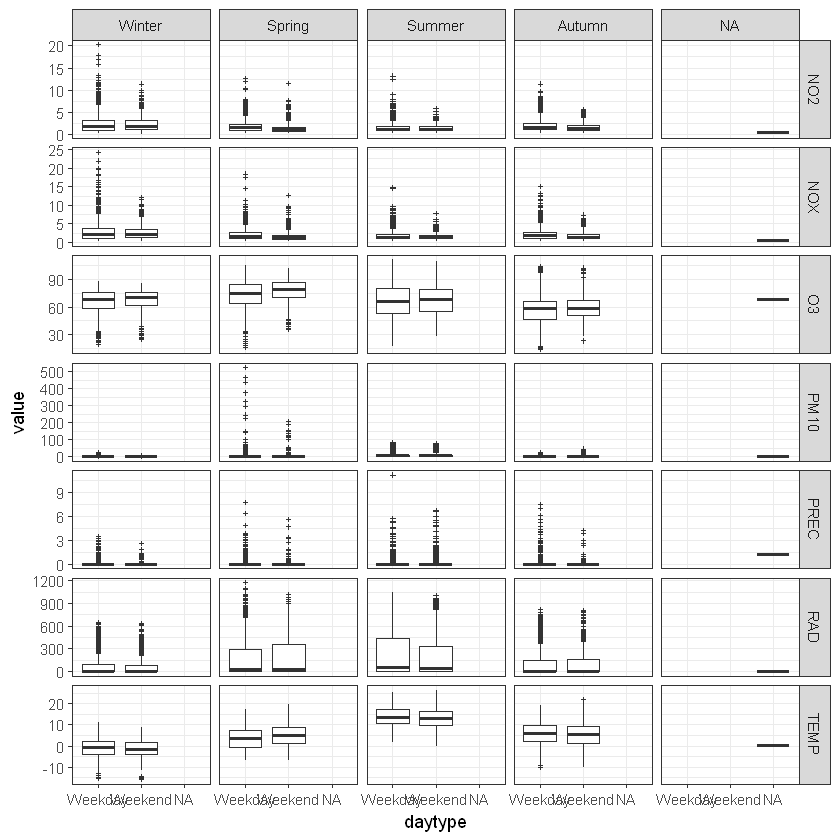

In [188]:
# DAVOS 
lf %>%
  filter(site=="DAV" & !is.na(value)) %>%
  ggplot +
  facet_grid(variable ~ season, scale = "free_y") +
  geom_boxplot(aes(daytype, value), outlier.size = 0.5, outlier.shape = 3)

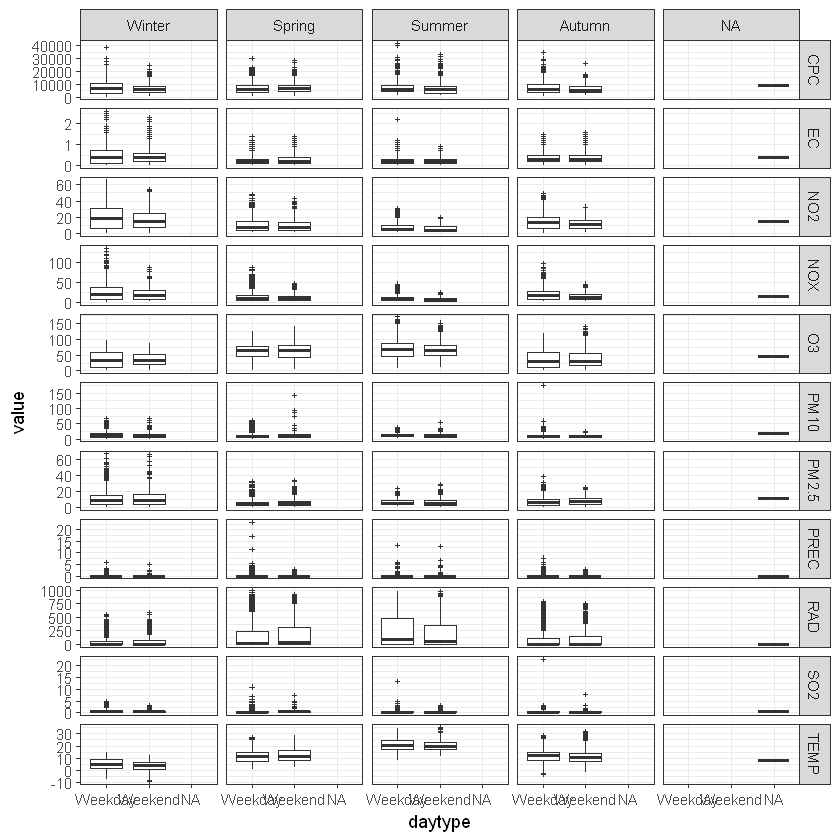

In [189]:
# BASEL 
lf %>%
  filter(site=="BAS" & !is.na(value)) %>%
  ggplot +
  facet_grid(variable ~ season, scale = "free_y") +
  geom_boxplot(aes(daytype, value), outlier.size = 0.5, outlier.shape = 3)

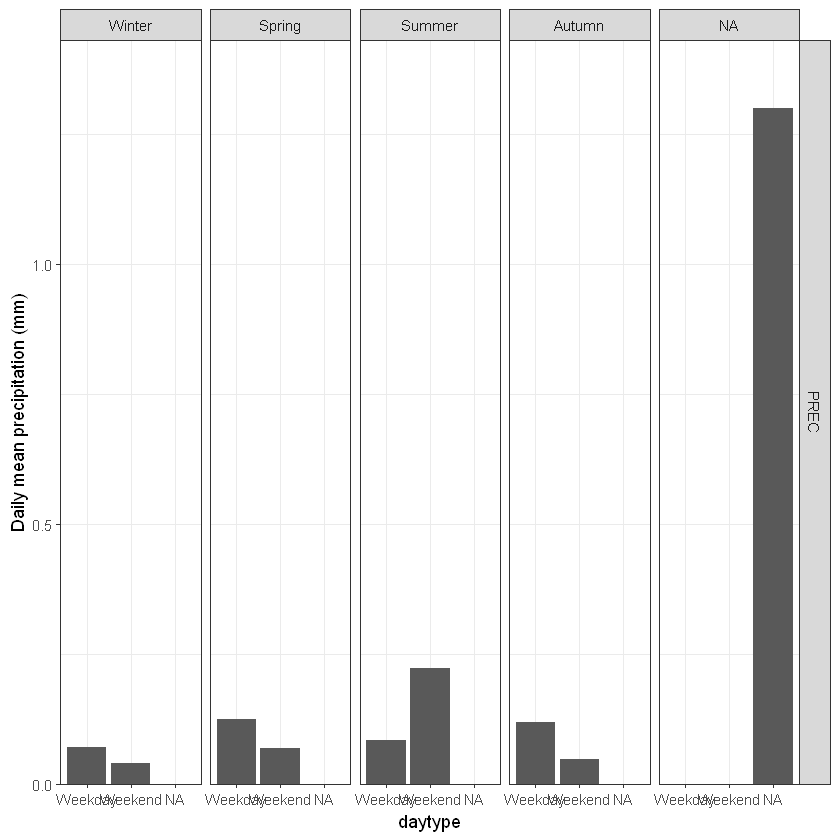

In [191]:
lf %>%
  filter(site=="DAV" & !is.na(value) & variable=="PREC") %>%
  ggplot +
  facet_grid(variable ~ season, scale = "free_y") +
  geom_bar(aes(daytype, value), stat="summary", fun="mean", show.legend = FALSE) +
  scale_y_continuous("Daily mean precipitation (mm)", expand=expansion(mult=c(0, 0.1)))